<a href="https://colab.research.google.com/github/RaianaSeixas/GERENCIADOR/blob/master/Ger_DE_WOA_PSO_print_ago_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
############################### Importar códigos

!git clone https://github.com/RaianaSeixas/GERENCIADOR.git #clonar do Github

fatal: destination path 'GERENCIADOR' already exists and is not an empty directory.


In [79]:
%cd
%cd /content/GERENCIADOR
!ls

/root
/content/GERENCIADOR
1_WOA_Main_R.ipynb    4_GWO_Main_R.ipynb  DE.py        GERENCIADOR  PSO.py
2_ABCMC_Main_R.ipynb  ABCMC.py		  Enxame.py    GWO.py	    __pycache__
3_PSO_Main_R.ipynb    ABC.py		  Function.py  MUT.py	    WOA.py


In [80]:
############################### Importar bibliotecas e iniciar a contagem do tempo
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint

############################### Importar códigos
'''
!git clone https://github.com/RaianaSeixas/GERENCIADOR.git #clonar do Github

# %cd
# %cd /content/GERENCIADOR
!ls
'''
############################### DADOS DE ENTRADA 
RUNS=100 #NÚMERO DE RODADAS


  ############################# FASE EXPLORAÇÃO 
ITE=30 #ITERACOES
NPAR=180 #AGENTES POR MÉTODO

  ############################# FASE MUTAÇÃO
itermut=60 #Iterações de mutação 
nw=30 #Agentes totais na fase de mutação
n=1 #qde de melhores agentes de tds os métodos coletados

  ############################# FASE CONVERGÊNCIA
ITE_G=120 #ITERAÇÕES
PTRADE=10 #NUM DE PARTÍCULAS A SERERM TROCADAS ENTRE OS MÉTODOS (menos MET simples)

W=0.75
C1=2
C2=2

  ############################### Função
import Function

'''
Fun=Function.Rosenbrock
dim=3
MAX=np.repeat(10,dim)
MIN=np.repeat(-10,dim)
#MAX=[30,30] # MAXIMO DE CADA PARAMETRO
#MIN=[-30,-30] # MINIMO DE CADA PARAMETRO
  #Global optimum: f(xi)= 0
'''
'''
dim=20
Fun=Function.Sphere
MAX=np.repeat(5.12,dim)
MIN=np.repeat(-5.12,dim)
  # f(x)=0 x=(0,0) [-5.12,5.12]
'''
'''
Fun=Function.Shubert
MAX=[10,10] # MAXIMO DE CADA PARAMETRO
MIN=[-10,-10] # MINIMO DE CADA PARAMETRO
  # Global Minimum: -186.7309 ; xi ∈ [-10,10]
'''
#'''
dim=3
Fun=Function.Schwefel
MAX=np.repeat(500,dim)
MIN=np.repeat(-500,dim)
  #Global optimum: f(xi)= 0 for xi = 420.968746 for i=1,...,n  ;  xi in [-500,500]  
#'''
'''
dim=30
Fun=Function.Rastrigin
MAX=np.repeat(5.12,dim)
MIN=np.repeat(-5.12,dim)
  # f(x)=0 x=(0,0) [-5.12,5.12]
'''

PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

##################################### IMPORTAR MÓDULOS
import Enxame
import MUT
import WOA
import ABC
import DE
import PSO


start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


BEST_AGENTS=[]
for i in range(RUNS):
    
##################################### BALEIAS - WOA
      
    X=Enxame.Enxame(PAR,NPAR,MAX,MIN) # inicializa baleias
    
    BEST_WOA,FOBEST_WOA,XY_WOA,BEST_XY_WOA=WOA.WOA(ITE,PAR,NPAR,MAX,MIN,Fun,X) #Roda Algoritmo
    
    print()
    #print("\n","WOA _",NPAR,"Agentes _",ITE,"Iterações _","Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__,"\n")
    #print("BEST=",BEST_WOA,"  FOBEST=",FOBEST_WOA,"\n")
    print("FOBEST=",FOBEST_WOA,"\n")
    
    XY_WOA_T=XY_WOA[0:PTRADE,]
    #print(XY_WOA_T)
      
##################################### DIFFERENTIAL EVOLUTION - DE
      
    #X=Enxame.Enxame(PAR,NPAR,MAX,MIN)
    mut=0.8
    crossp=0.7
    BEST_DE,FOBEST_DE,XY_DE,BEST_XY_DE=DE.DE(MAX,MIN, mut, crossp, NPAR, ITE,Fun) #Roda Algoritmo

    
    #print("\n","WOA _",NPAR,"Agentes _",ITE,"Iterações _","Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__,"\n")
    #print("BEST=",BEST_DE,"  FOBEST=",FOBEST_DE,"\n")
    print("FOBEST=",FOBEST_DE,"\n")
    
    XY_DE_T=XY_DE[0:PTRADE,]
    #print(XY_WOA_T)
    
################################### SOS Mutações

    MBEST=np.vstack([BEST_XY_WOA,BEST_XY_DE]) # reúne o melhor agente de cada método
    #print(MBEST)

    XYm3=np.vstack((XY_WOA,XY_DE))
    XYm3=XYm3[XYm3[:,-1].argsort()]
    XYm3=XYm3[0:nw]
    #print(XYm3)
    
    nt=1 #qde de melhores agentes de cada método coletados (primeira iter)
    XY=np.vstack((XY_WOA[nt],XY_DE[nt]))
    XY3BEST = XY[XY[:,-1].argsort()] #Ordena a partir de Y
    XYCollect=XY3BEST
      
    #Aplica intermut iterações, coleta n melhores agentes, e faz um sort 
    for i in range(itermut):      
        Xnew3=MUT.MUT3(XYm3,XY3BEST,nw,PAR,MAX,MIN) # Aplica Mutação
        Ynew3=MUT.FOBJ(Xnew3,Fun) # Obter FO mutante
               
        #XYnew=MUT.XYsort(Xnew3,Ynew3) #Junta e ordena tds os agentes
        XYnew= np.c_[Xnew3,Ynew3] #concatena X e Y
        #print(XYnew)
        for j in range(len(XYm3)):
          if XYm3[:,-1][j]<XYnew[:,-1][j]:
            XYnew[j]=np.copy(XYm3[j])
        XYnew=XYnew[XYnew[:,-1].argsort()]
        
        XY3BEST=XYnew[0:n] 
        
    #XYCOLECT=np.vstack((XYCOLECT,XY3BEST))
    #XYCOLECTst = XYCOLECT[XYCOLECT[:,-1].argsort()]
    BEST=XY3BEST[0]
    FOBEST=BEST[-1]
    print('Mut:',FOBEST)
  
    
################################### GERENCIADOR
    
    #XY_G3new=np.vstack((XYCollect,XYm3[0:PTRADE]))
    XY_G3new=np.vstack((MBEST,XYnew[0:PTRADE]))
    #print(XY_G3new)
    X_G3new=MUT.GETX(XY_G3new,PAR) #Extrai as primeiras colunas (valores de X)
       
    BEST_G,FOBEST_G,XY_G,BEST_XY_G=PSO.PSO(W,C1,C2,len(X_G3new),(ITE_G),PAR,MAX,MIN,Fun,X_G3new)
    
    BEST_AGENTS.append(BEST_XY_G)
    
    #print("\n","Gerenciador 3_NEW",len(X_G3new),"Agentes _",ITE_G,"Iterações _","Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__,"\n")
    #print("BEST=",BEST_G,"  FOBEST=",FOBEST_G,"\n")
    print("FOBEST=",FOBEST_G,"\n")
       
############################## Cálculo dos Parâmetros de Avaliação  

TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

print("\n","Gerenciador MC_","Min/Max=",MIN[0],"/",MAX[0],'_','Dim=', PAR,'_',Fun.__name__)
print('Fase Exploração:  ',NPAR,'Agentes_',ITE,'Iterações')
print('Fase Mutação:     ',nw,'Agentes_',itermut,'Iterações')
print('Fase Convergência:',len(X_G3new)," Agentes_",ITE_G,"Iterações",'\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN__: ',MINFO)
print('MAX__: ',MAXFO)
print('STD__: ',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas')


FOBEST= 119.69806227688878 

FOBEST= 17.70193617954692 

Mut: 17.70193617954692
FOBEST= 17.70193617954692 


FOBEST= 1.8317547887604633 

FOBEST= 27.830583492284404 

Mut: 0.1982715842500511
FOBEST= 0.1982715842500511 


FOBEST= 1.336955309996256 

FOBEST= 2.8322105875874968 

Mut: 0.38264457708351074
FOBEST= 0.38264457708351074 


FOBEST= 119.42324941650077 

FOBEST= 11.248886338383272 

Mut: 11.248886338383272
FOBEST= 11.248886338383272 


FOBEST= 124.38313802525181 

FOBEST= 24.16362265947282 

Mut: 24.16362265947282
FOBEST= 24.16362265947282 


FOBEST= 0.43963154005177785 

FOBEST= 9.266473105756631 

Mut: 0.0746973811267253
FOBEST= 0.0746973811267253 


FOBEST= 119.24425169345227 

FOBEST= 19.364056264607825 

Mut: 19.364056264607825
FOBEST= 2.745247145641997 


FOBEST= 118.89391861703916 

FOBEST= 41.32171135513454 

Mut: 41.32171135513454
FOBEST= 10.723663316890452 


FOBEST= 119.82421370364432 

FOBEST= 0.4030193902394785 

Mut: 0.4030193902394785
FOBEST= 0.4030193902394785 



In [0]:
best=BEST_AGENTS[:,-1]

{'boxes': [<matplotlib.lines.Line2D at 0x7fe0469005c0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe046900dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0468aab00>],
 'means': [<matplotlib.lines.Line2D at 0x7fe0468aa7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0468aa4a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe046900710>,
  <matplotlib.lines.Line2D at 0x7fe046900a90>]}

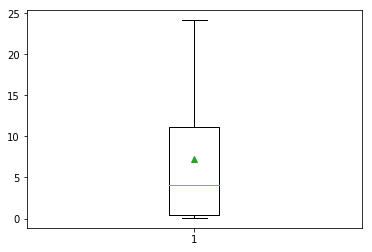

In [84]:
plt.boxplot(best,showmeans=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fe046878128>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe046878940>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x7fe046884358>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe046878fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe046878278>,
  <matplotlib.lines.Line2D at 0x7fe0468785f8>]}

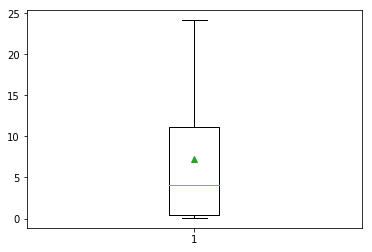

In [85]:
plt.boxplot(best,showmeans=True,sym='')